# Assignment #2 Stationarity of GDP
### Karim Kanji IA-20

####Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns 

#### File upload

In [2]:
from google.colab import files
data = files.upload()


Saving GDP HandsOn.csv to GDP HandsOn.csv


#### Check head

In [3]:
path = 'GDP HandsOn.csv'
df = pd.read_csv(path)
df.head()

,Year,GDP,Comments
0,1960,22502.07323,Monitoring starts
1,1961,24373.13440,NaN
2,1962,21559.88869,NaN
3,1963,21251.28380,NaN
4,1964,21852.94983,NaN


## Task 1:
### Plot GDP trend over time

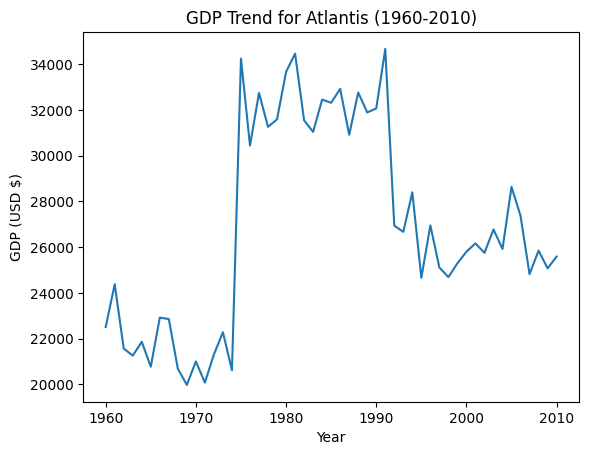

In [4]:
plt.plot(df['Year'], df['GDP'])
plt.xlabel('Year')
plt.ylabel('GDP (USD $)')
plt.title('GDP Trend for Atlantis (1960-2010)')
plt.show()

From the plot we can see that over time, the GDP of Atlantis has increased with a large increase between 1970 and 1980. There was however a large dip in about 1990-1993. Even after the large dip the GDP is still higher compared to 1960-1970

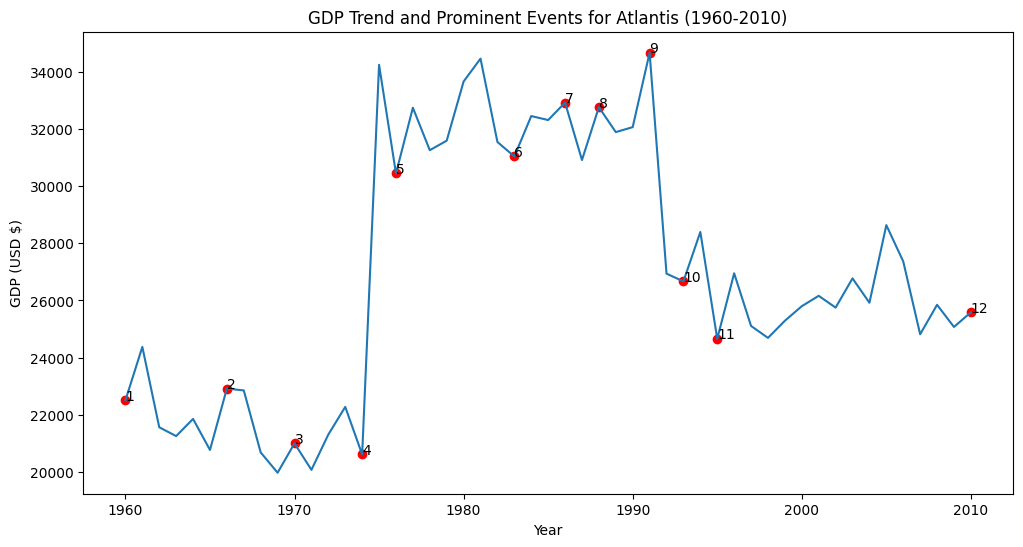

Prominent Events:
1. Monitoring starts
2. GE factory announced
3. GE factory begins production
4. Major reforms
5. Earthquake
6. King dies. Queen takes over
7. Queen abdicates
8. Oil discovered
9. First oil well starts
10. War begins
11. War ends
12. Monitoring ends


In [5]:
comments = df['Comments'][df['Comments'].notnull()].tolist()
event_numbers = list(range(1, len(comments) + 1))

plt.figure(figsize=(12,6))
plt.plot(df['Year'], df['GDP'])
plt.scatter(df['Year'][df['Comments'].notnull()], df['GDP'][df['Comments'].notnull()], color='red')

for i in range(len(comments)):
    plt.annotate(event_numbers[i], xy=(df['Year'][df['Comments'].notnull()].iloc[i], df['GDP'][df['Comments'].notnull()].iloc[i]))

plt.xlabel('Year')
plt.ylabel('GDP (USD $)')
plt.title('GDP Trend and Prominent Events for Atlantis (1960-2010)')
plt.show()

print("Prominent Events:")
for i, comment in enumerate(df['Comments'].dropna()):
    print(f"{i+1}. {comment}")

## Task 2: 
### Long-lasting impact:
#### The events that lead to a long-lasting impact were 4 and 9, they both lead to a major impact which continued for a long time.

### Short-term impact:
#### I would say that 3, 5, 6, 7, 10, 11 all lead to some form of short-term impact, since there is a clear spike after every event listed.

### No impact at all:
#### Obviously when monitoring begins and ends doesn't affect the GDP, also after event number 2, there seems to be a realitvly stationary plateau with a slight decline which indicates a non significant event

## Task 3:
### Identify seasonality and decompose

In [7]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(df['GDP'], model='multiplicative', period=1)
# result.plot()
# plt.show()

# Revision available below

From the plot we can see that there is no seasonality

## Task 4: 
### Stationarity

In [8]:
from statsmodels.tsa.stattools import adfuller 
GDP = df['GDP'].values
result = adfuller(GDP, autolag='AIC') 

print(f'p-value: {result[1]}'," <-- Less than 0.05 for Stationary process. Close to 1 for trend+Seasonal NON-Stationary process")

p-value: 0.5173340798828286  <-- Less than 0.05 for Stationary process. Close to 1 for trend+Seasonal NON-Stationary process


According to the code we used during the lesson, the GDP is non-stationary because the p-value is close to 1, and no where near 0.05

# Revision

---





"Hello Karim, Thank you for submitting the assignment on time. However, I request you to think over some of the statements made by you. First of all, do we ever **stop with checking seasonality at period 1?** Second, **did oil wells have any lasting impact**. Lastly, if (as you say) **process is non-stationary, then do you really find no trend or seasonality?**

I am intentionally not assessing your submission. Would you like to rethink, revise and resubmit?"

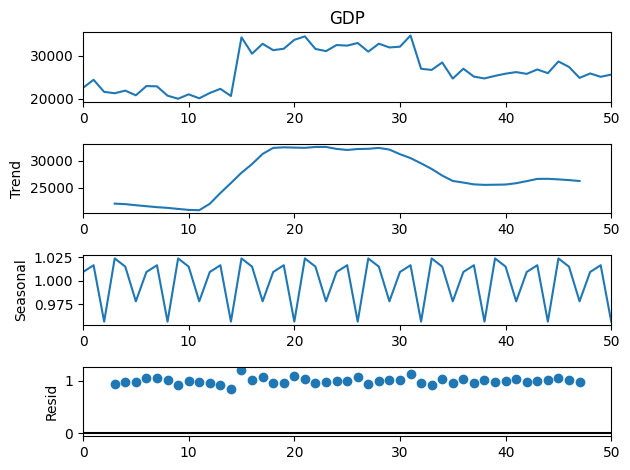

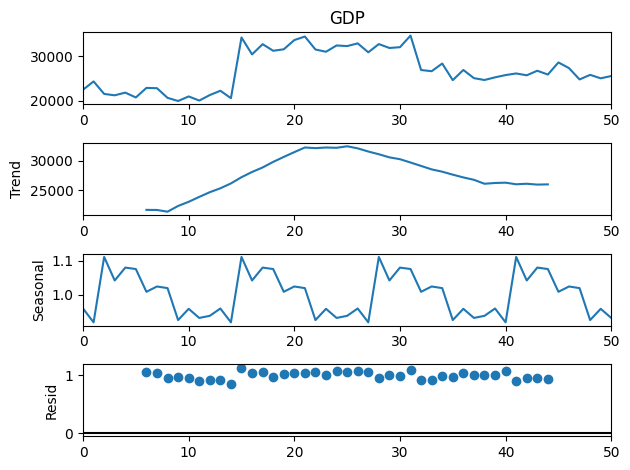

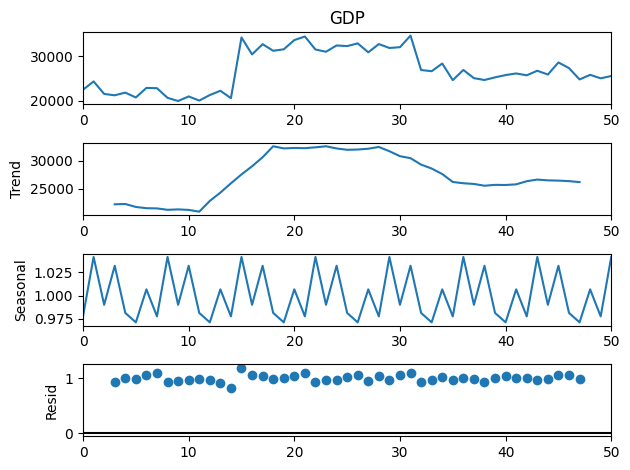

In [10]:
# Seasonality with other than period 1:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['GDP'], model='multiplicative', period=6)
result.plot()
result2 = seasonal_decompose(df['GDP'], model='multiplicative', period=13)
result2.plot()
result3 = seasonal_decompose(df['GDP'], model='multiplicative', period=7)
result3.plot()
plt.show()

When checking with other periods there seems to be a clear seasonality, this is something I would like to clear up with you during the lesson, how to check which is the correct period to do this analysis with.

# Oil wells and their lasting impact
The plot does show a decrease in GDP after Event 9 (the start of the first oil well). This decrease could be a short-term effect of the event, as the economy may have needed time to adjust to the new industry. It is also possible that there were other factors that contributed to the decrease in GDP during that time period. It would be necessary to do further analysis to determine the exact cause of the decrease in GDP. 
My best bet is that there could have been such a scenario that the whole countries economy went through adjustment, and that was the reason for the long-term drop in average GDP is due to this adjustment, this would mean that the oil well discovery was led to a short-term spiked drop, but there after it was secondary effects which caused the economy to stay at a lower level than before event 9.

# Trend
As I mentioned in task 1, the trend is definetly increasing even though there was a period of low to high to slightly low (which is still higher than the original low), the net increase is still there. 